<a href="https://colab.research.google.com/github/andrey-gl/study2020/blob/master/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Дисперсионный анализ


Пусть даны $k$ независимых выборок $\mathbf{X}^1 = (X^1_1...X^1_{n_1})$, ..., $\mathbf{X}^k = (X^k_1...X^k_{n_1})$, где $X^j_i \sim N_{a_j, \sigma^2}$. 

Проверяется основная гипотеза $H_0 = (a_1=....=a_k)$.

Для каждой выборки вычислим выборочное среднее и выборочную дисперсию:

$$\overline{X}^j = \frac{1}{n_j} \sum_{i=1}^{n_j}X_i^j,  {S^2}^i = \frac{1}{n_j} \sum_{i=1}^{n_j} (X_i^j - \overline{X}^j)^2$$.

Положим $n = n_1 + ... + n_k$. Тогда:
1. $\overline{X} = \frac{1}{n} \sum \limits_{i, j} X_i^j, S^2 = \frac{1}{n} \sum \limits_{i, j} (X_i^j - \overline{X})^2$ - общее выборочное среднее и общая выборочная дисперсия;
2. $S_м^2 = \frac{1}{n} \sum \limits_{j=1}^k n_j(\overline{X}^j - \overline{X})^2$ - межгрупповая дисперсия;
3. $S_в^2 = \frac{1}{n} \sum \limits_{j=1}^k \sum \limits_{i=1}^{n_j} (X_i^j - \overline{X}^j)^2 $ - общая внутригрупповая дисперсия.

Легко проверить, что:
$$\frac{nS^2}{\sigma^2} = \frac{nS_м^2}{\sigma^2} + \frac{nS_в^2}{\sigma^2}$$ 

В этой соотношении $\frac{nS^2}{\sigma^2} \sim H_{n-1}, \frac{nS_м^2}{\sigma^2} \sim H_{k-1}, \frac{nS_в^2}{\sigma^2} \sim H_{n-k}$.

Построим статистику критерия следующим образом:

$$T = \frac{nS_м^2}{\sigma^2(k-1)} \frac{\sigma^2(n-k)}{nS_в^2} \sim F_{k-1, n-k}$$

In [86]:
import numpy as np
import scipy.stats as stats

x1 = np.array([1, 2, 5])
x2 = np.array([2, 4, 2])
x3 = np.array([9, 9, 9])

m = np.array([x1.mean(),x2.mean(),x3.mean()])
x = np.vstack((x1, x2, x3))

s = x.var()*9
sm = m.var()*9
sb = x1.var()*3 + x2.var()*3 + x3.var()*3

F = (sm/2)/(sb/6)

1-stats.f.cdf(F, 2, 6)


F, 1-stats.f.cdf(F, 2, 6), stats.f_oneway(x1, x2, x3)


(21.235294117647058,
 0.001896788378982106,
 F_onewayResult(statistic=21.23529411764707, pvalue=0.001896788378982122))

#Линейная регрессия

Рассмотрим связь двух случайных величин: $Y = a + bX$, где $X = (X_1...X_n)$ и $Y = (Y_1...Y_n)$. 

Метод наименьших квадратов: $RSS = \sum \limits_i (Y_i - (a+bX_i))^2$ минимизируем.

Коэффициент детерминации: $R^2 = 1 - \frac{\frac{1}{n} \sum \limits_i(Y_i - (a + bX_i))^2}{\frac{1}{n} \sum \limits_i(Y_i - \overline{Y})^2}$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('sample_data/Albuquerque Home Prices.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [3]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


In [5]:
print('Rows in the data frame: {0}'.format(len(df)))
print('Rows without NAN: {0}'.format(len(df.dropna(how='any'))))

Rows in the data frame: 117
Rows without NAN: 66


In [6]:
df.apply(lambda x: sum(x.isnull()), axis=0)

PRICE     0
SQFT      0
AGE      49
FEATS     0
NE        0
CUST      0
COR       0
TAX      10
dtype: int64

In [7]:
del df['AGE']

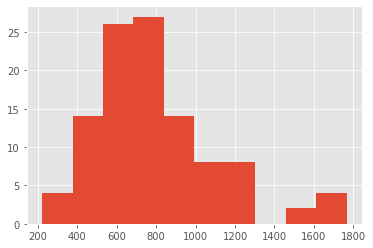

In [8]:
df['TAX'].hist()
plt.show()

In [9]:
df['TAX'] = df['TAX'].fillna(df['TAX'].mean())

In [10]:
len(df.dropna())

117

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [14]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.8022436103807492


In [16]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,83.175919
1,SQFT,0.291978
2,FEATS,12.176743
3,NE,8.011604
4,CUST,133.014342
5,COR,-65.800841
6,TAX,0.541942


In [17]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,83.175919,1.895059e-01
1,SQFT,0.291978,2.580075e-06
2,FEATS,12.176743,3.419172e-01
3,NE,8.011604,8.190403e-01
4,CUST,133.014342,3.454095e-03
5,COR,-65.800841,1.168611e-01
6,TAX,0.541942,4.972770e-07


In [18]:
df.corr()

,PRICE,SQFT,FEATS,NE,CUST,COR,TAX
PRICE,1.000000,0.844795,0.420272,0.167840,0.555292,-0.079293,0.844889
SQFT,0.844795,1.000000,0.394925,0.145030,0.520102,0.040528,0.832674
FEATS,0.420272,0.394925,1.000000,0.190016,0.241964,-0.041547,0.419473
NE,0.167840,0.145030,0.190016,1.000000,0.043033,-0.077336,0.189230
CUST,0.555292,0.520102,0.241964,0.043033,1.000000,-0.003994,0.444906
COR,-0.079293,0.040528,-0.041547,-0.077336,-0.003994,1.000000,-0.058329
TAX,0.844889,0.832674,0.419473,0.189230,0.444906,-0.058329,1.000000


In [20]:
X = df[['SQFT', 'CUST']]
model.fit(X, y)
print(model.score(X, y))
regression_coef(model, X, y)

0.7320966420178658


,predictor,coef,pvalue
0,intercept,114.134824,0.082734
1,SQFT,0.553635,0.000000
2,CUST,142.859931,0.005787
